**Nama : Aulia Marshanda<br>**
**NIM  : 211351034<br>**
**Kelas: Pagi B**

**IMPORT DATASET**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"auliamarshanda","key":"f2bfa393a258d873c5673d55fa41d679"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d harrywang/wine-dataset-for-clustering --force

  0% 0.00/4.36k [00:00<?, ?B/s]
100% 4.36k/4.36k [00:00<00:00, 5.54MB/s]


In [4]:
!unzip wine-dataset-for-clustering

Archive:  wine-dataset-for-clustering.zip
  inflating: wine-clustering.csv     


**IMPORT LIBRARY**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

**DATA DISCOVERY**

In [6]:
df = pd.read_csv('wine-clustering.csv')
df1 = pd.read_csv('wine-clustering.csv')

In [7]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [9]:
df.fillna(0, inplace=True)

cols_to_convert = [
    "Alcohol", "Malic_Acid", "Ash", "Ash_Alcanity",
    "Magnesium", "Total_Phenols", "Flavanoids",
    "Nonflavanoid_Phenols", "Proanthocyanins",
    "Color_Intensity", "Hue", "OD280",
    "Proline"
]

df[cols_to_convert] = df[cols_to_convert].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Alcohol               178 non-null    int64
 1   Malic_Acid            178 non-null    int64
 2   Ash                   178 non-null    int64
 3   Ash_Alcanity          178 non-null    int64
 4   Magnesium             178 non-null    int64
 5   Total_Phenols         178 non-null    int64
 6   Flavanoids            178 non-null    int64
 7   Nonflavanoid_Phenols  178 non-null    int64
 8   Proanthocyanins       178 non-null    int64
 9   Color_Intensity       178 non-null    int64
 10  Hue                   178 non-null    int64
 11  OD280                 178 non-null    int64
 12  Proline               178 non-null    int64
dtypes: int64(13)
memory usage: 18.2 KB


In [11]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14,1,2,15,127,2,3,0,2,5,1,3,1065
1,13,1,2,11,100,2,2,0,1,4,1,3,1050
2,13,2,2,18,101,2,3,0,2,5,1,3,1185
3,14,1,2,16,113,3,3,0,2,7,0,3,1480
4,13,2,2,21,118,2,2,0,1,4,1,2,735


In [12]:
X = df.drop(['OD280'], axis=1)

In [13]:
df.to_csv('wine-clustering.csv', index=False)

In [14]:
print(X)

     Alcohol  Malic_Acid  Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0         14           1    2            15        127              2   
1         13           1    2            11        100              2   
2         13           2    2            18        101              2   
3         14           1    2            16        113              3   
4         13           2    2            21        118              2   
..       ...         ...  ...           ...        ...            ...   
173       13           5    2            20         95              1   
174       13           3    2            23        102              1   
175       13           4    2            20        120              1   
176       13           2    2            20        120              1   
177       14           4    2            24         96              2   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  Hue  \
0             3                     0      

In [15]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline
0,14,1,2,15,127,2,3,0,2,5,1,1065
1,13,1,2,11,100,2,2,0,1,4,1,1050
2,13,2,2,18,101,2,3,0,2,5,1,1185
3,14,1,2,16,113,3,3,0,2,7,0,1480
4,13,2,2,21,118,2,2,0,1,4,1,735


**EDA**

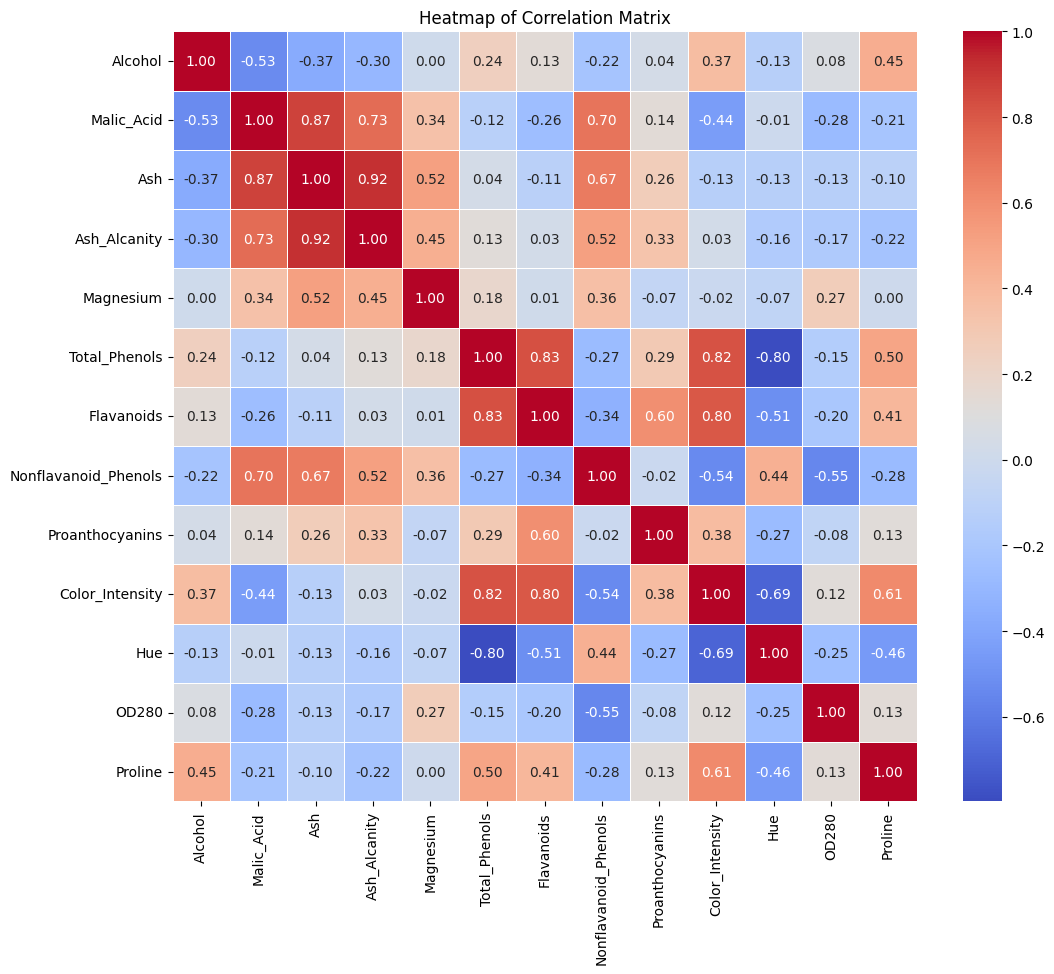

In [16]:
data = {
    'Alcohol': [14.23, 13.2, 13.16, 14.37, 13.24, 14.2, 14.39, 14.06, 14.83, 13.86],
    'Malic_Acid': [1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87, 2.15, 1.64, 1.35],
    'Ash': [2.43, 2.14, 2.67, 2.5, 2.87, 2.45, 2.45, 2.61, 2.17, 2.27],
    'Ash_Alcanity': [15.6, 11.2, 18.6, 16.8, 21, 15.2, 14.6, 17.6, 14, 16],
    'Magnesium': [127, 100, 101, 113, 118, 112, 96, 121, 97, 98],
    'Total_Phenols': [2.8, 2.65, 2.8, 3.85, 2.8, 3.27, 2.5, 2.6, 2.8, 2.98],
    'Flavanoids': [3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52, 2.51, 2.98, 3.15],
    'Nonflavanoid_Phenols': [0.28, 0.26, 0.3, 0.24, 0.39, 0.34, 0.3, 0.31, 0.29, 0.22],
    'Proanthocyanins': [2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.98, 1.25, 1.98, 1.85],
    'Color_Intensity': [5.64, 4.38, 5.68, 7.8, 4.32, 6.75, 5.25, 5.05, 5.2, 7.22],
    'Hue': [1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.02, 1.06, 1.08, 1.01],
    'OD280': [3.92, 3.4, 3.17, 3.45, 2.93, 2.85, 3.58, 3.58, 2.85, 3.55],
    'Proline': [1065, 1050, 1185, 1480, 735, 1450, 1290, 1295, 1045, 1045]
}

# Membuat dataframe
df = pd.DataFrame(data)

# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap of Correlation Matrix')

# Menampilkan plot
plt.show()

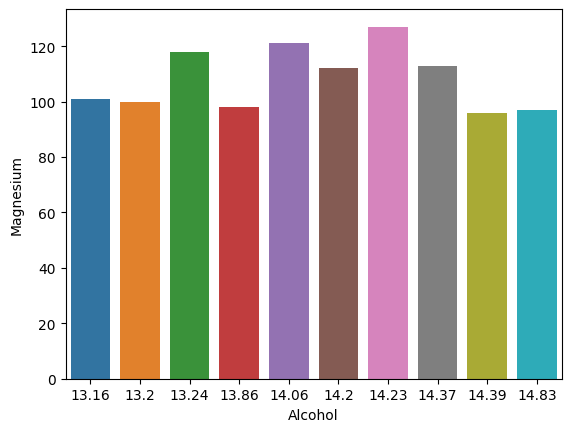

In [17]:
sns.barplot(x='Alcohol', y='Magnesium', data=df)
plt.show()

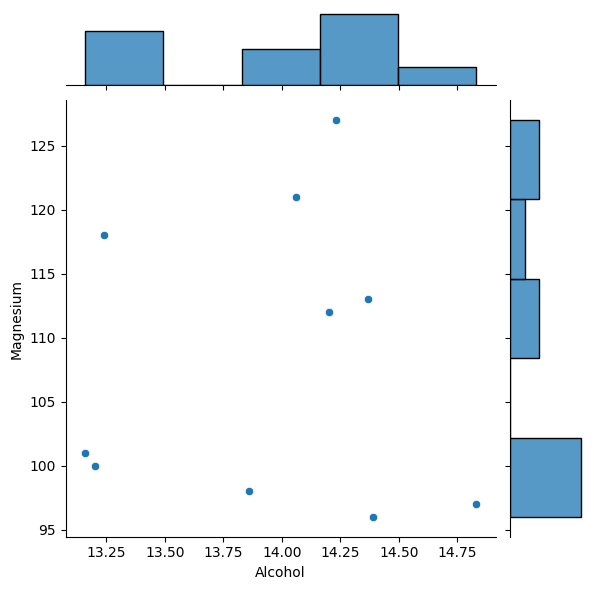

In [18]:
sns.jointplot(x='Alcohol', y='Magnesium', data=df, kind='scatter')
plt.show()

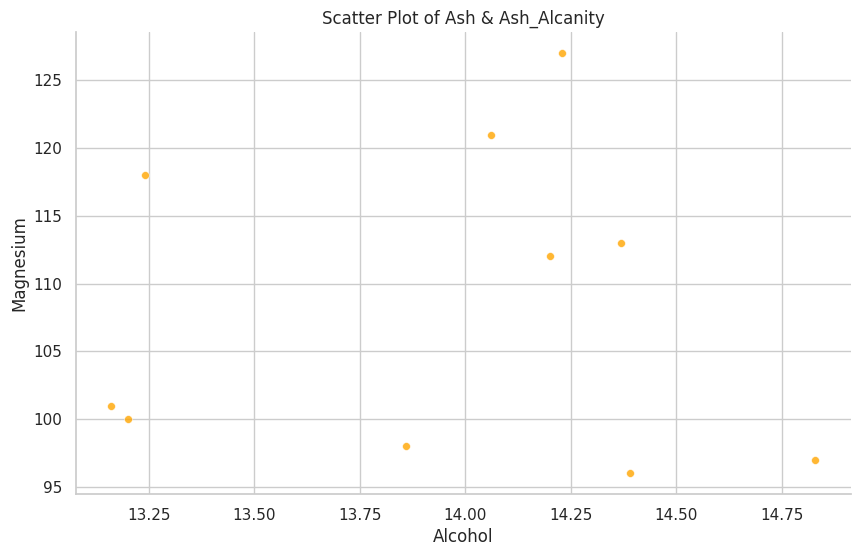

In [19]:
sns.set(style="whitegrid")

# Data frame yang diambil (_df_6) dan kolom yang digunakan ('Alcohol' dan 'Magnesium')
x = df['Alcohol']
y = df['Magnesium']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, s=32, alpha=0.8, color='orange')

# Menambahkan judul dan mengatur label sumbu
plt.title('Scatter Plot of Ash & Ash_Alcanity')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')

# Menghilangkan garis atas dan kanan pada plot
sns.despine(right=True, top=True)

# Menampilkan plot
plt.show()

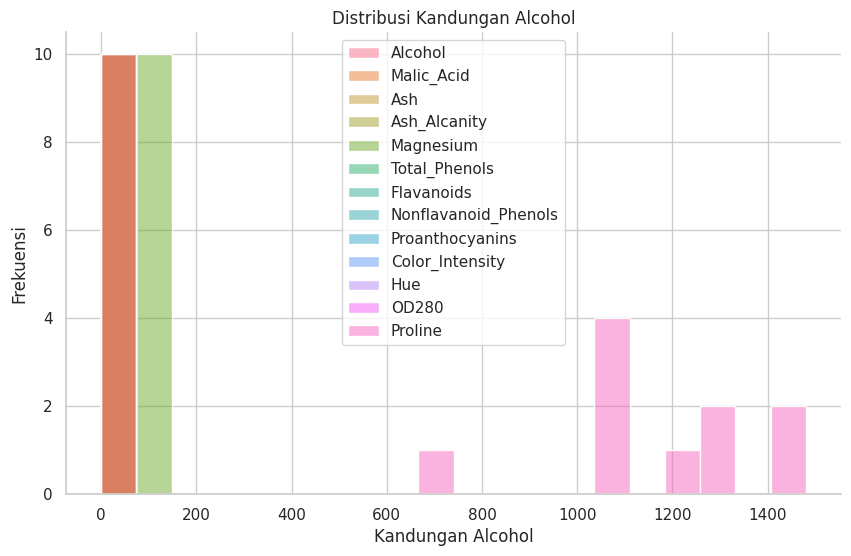

In [20]:
sns.set(style="whitegrid")

# Mengambil kolom 'Alcohol' dari DataFrame (df)
df = ['Alcohol']

# Membuat histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=20, kde=False, color='skyblue')

# Menambahkan judul dan mengatur label sumbu
plt.title('Distribusi Kandungan Alcohol')
plt.xlabel('Kandungan Alcohol')
plt.ylabel('Frekuensi')

# Menghilangkan garis atas dan kanan pada plot
sns.despine(right=True, top=True)

# Menampilkan plot
plt.show()

**PREPOCESSING**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

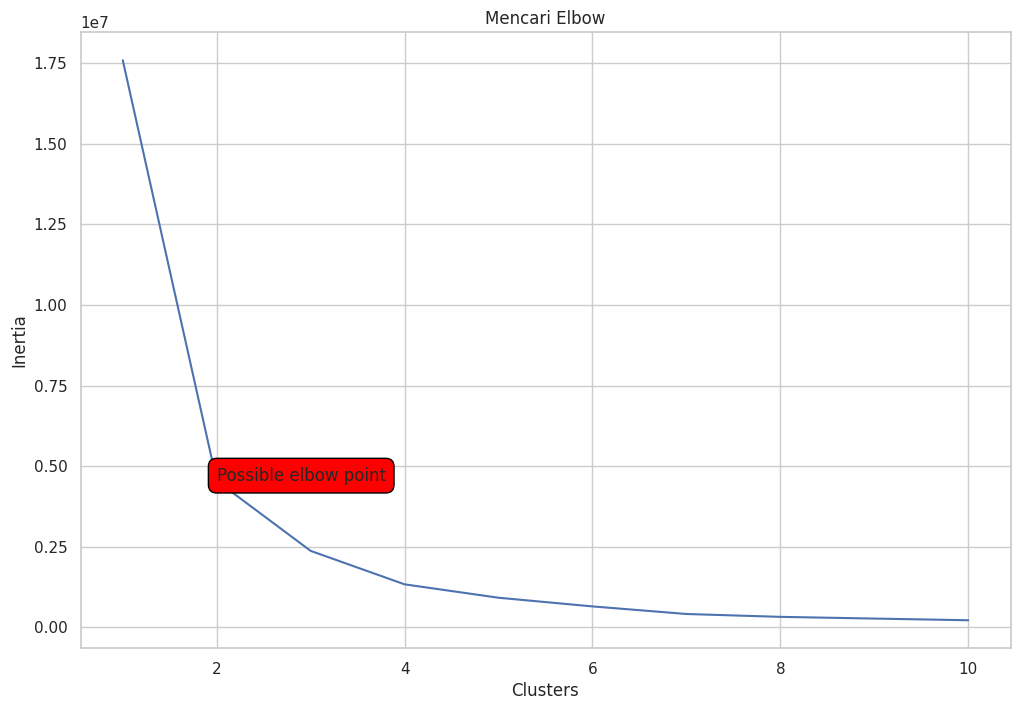

In [21]:
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

# Menemukan elbow point
diff = [clusters[i] - clusters[i + 1] for i in range(len(clusters)-1)]

# Mencari indeks dengan perubahan terbesar
elbow_index = diff.index(max(diff)) + 1

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Mencari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Menandai elbow point pada grafik
ax.annotate('Possible elbow point',
            xy=(elbow_index, clusters[elbow_index]),
            xytext=(elbow_index+1, clusters[elbow_index] + 5000),
            arrowprops=dict(facecolor='red', arrowstyle='->'),
            bbox=dict(facecolor='red', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

**MODELING**

In [35]:
# data = {
#     'Alcohol': [14.23, 13.20, 13.16, 14.37, 13.24],
#     'Malic_Acid': [1.71, 1.78, 2.36, 1.95, 2.59],
#     'Ash': [2.43, 2.14, 2.67, 2.50, 2.87],
#     'Ash_Alcanity': [15.6, 11.2, 18.6, 16.8, 21.0],
#     'Magnesium': [127, 100, 101, 113, 118],
#     'Total_Phenols': [2.80, 2.65, 2.80, 3.85, 2.80],
#     'Flavanoids': [3.06, 2.76, 3.24, 3.49, 2.69],
#     'Nonflavanoid_Phenols': [0.28, 0.26, 0.30, 0.24, 0.39],
#     'Proanthocyanins': [2.29, 1.28, 2.81, 2.18, 1.82],
#     'Color_Intensity': [5.64, 4.38, 5.68, 7.80, 4.32],
#     'Hue': [1.04, 1.05, 1.03, 0.86, 1.04],
#     'OD280': [3.92, 3.40, 3.17, 3.45, 2.93],
#     'Proline': [1065, 1050, 1185, 1400, 735],
# }

# Membuat DataFrame dari data
X1 = df1

# Mengisi nilai yang hilang dengan 0
X.fillna(0, inplace=True)

# Menghilangkan kolom 'Color_Intensity' sebelum melakukan clustering
X_clustering = X.drop('Color_Intensity', axis=1)

# Menentukan jumlah kluster
n_clust = 5

# Melakukan KMeans clustering
kmeans = KMeans(n_clusters=n_clust).fit(X1)

# Menambahkan kolom label kluster ke DataFrame
X1['Labels'] = kmeans.labels_

# Tampilkan DataFrame setelah penambahan label kluster
print(X1)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
X1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3


In [38]:
# data = {
#     'Alcohol': [14.23, 13.20, 13.16, 14.37, 13.24],
#     'Malic_Acid': [1.71, 1.78, 2.36, 1.95, 2.59],
#     'Ash': [2.43, 2.14, 2.67, 2.50, 2.87],
#     'Ash_Alcanity': [15.6, 11.2, 18.6, 16.8, 21.0],
#     'Magnesium': [127, 100, 101, 113, 118],
#     'Total_Phenols': [2.80, 2.65, 2.80, 3.85, 2.80],
#     'Flavanoids': [3.06, 2.76, 3.24, 3.49, 2.69],
#     'Nonflavanoid_Phenols': [0.28, 0.26, 0.30, 0.24, 0.39],
#     'Proanthocyanins': [2.29, 1.28, 2.81, 2.18, 1.82],
#     'Color_Intensity': [5.64, 4.38, 5.68, 7.80, 4.32],
#     'Hue': [1.04, 1.05, 1.03, 0.86, 1.04],
#     'OD280': [3.92, 3.40, 3.17, 3.45, 2.93],
#     'Proline': [1065, 1050, 1185, 1400, 735],
# }

# # Membuat DataFrame dari data
X = pd.DataFrame(data)

# # Mengisi nilai yang hilang dengan 0
X.fillna(0, inplace=True)

# # Menghilangkan kolom 'Color_Intensity' sebelum melakukan clustering
X_clustering = X.drop('Color_Intensity', axis=1)

# # Menentukan jumlah kluster
n_clust = 5

# # Melakukan KMeans clustering
kmeans = KMeans(n_clusters=n_clust).fit(X_clustering)

# # Menambahkan kolom label kluster ke DataFrame
X['Labels'] = kmeans.labels_

# # Tampilkan DataFrame setelah penambahan label kluster
print(X)

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   
5    14.20        1.76  2.45          15.2        112           3.27   
6    14.39        1.87  2.45          14.6         96           2.50   
7    14.06        2.15  2.61          17.6        121           2.60   
8    14.83        1.64  2.17          14.0         97           2.80   
9    13.86        1.35  2.27          16.0         98           2.98   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


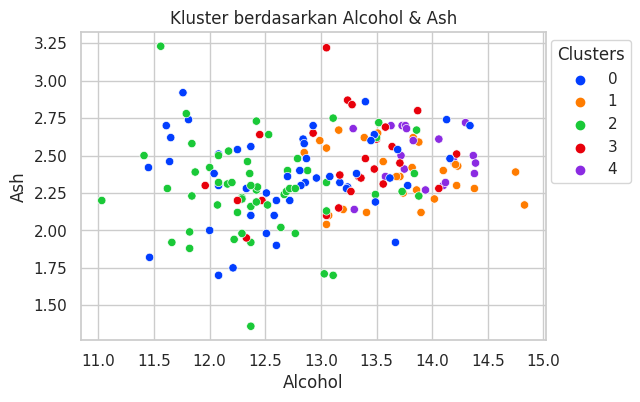

In [39]:
plt.figure(figsize=(6, 4))

# Membuat scatter plot dengan warna berdasarkan label kluster
sns.scatterplot(data=X1, x="Alcohol", y="Ash", hue="Labels", palette='bright', markers=True)

# Menambahkan legenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.2, 1))

# Menambahkan judul dan label sumbu
plt.title('Kluster berdasarkan Alcohol & Ash')
plt.xlabel('Alcohol')
plt.ylabel('Ash')

# Menampilkan plot
plt.show()

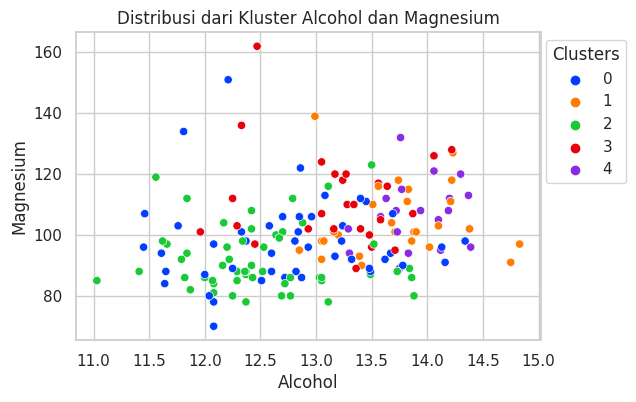

In [40]:
plt.figure(figsize=(6, 4))

# Membuat scatter plot dengan warna berdasarkan label kluster
sns.scatterplot(data=X1, x=X1['Alcohol'], y=X1['Magnesium'], hue=X1['Labels'], palette='bright', markers=True)

# Menambahkan legenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.2, 1))

# Menambahkan judul dan label sumbu
plt.title('Distribusi dari Kluster Alcohol dan Magnesium')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')

# Menampilkan plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

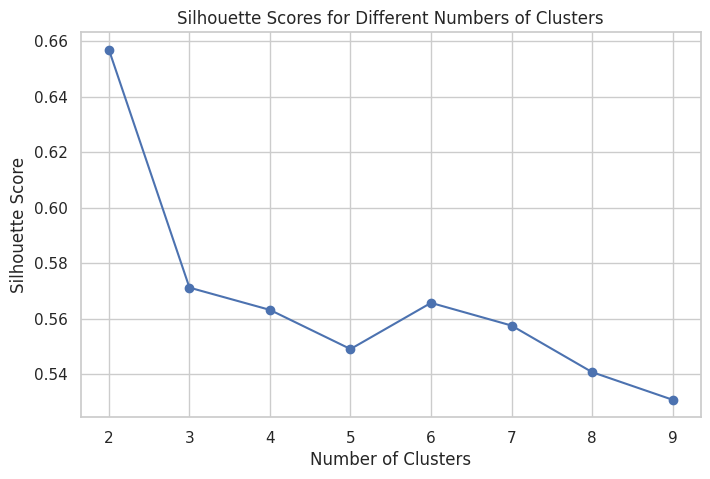

In [41]:
# Menghilangkan kolom 'Hue' dan 'Labels' sebelum melakukan klastering
X1 = X1.drop(['Hue', 'Labels'], axis=1)

silhouette_scores = []

for num_clusters in range(2, min(10, len(X1))):
    kmeans = KMeans(n_clusters=num_clusters)
    labels = kmeans.fit_predict(X1)

    silhouette_avg = silhouette_score(X1, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(range(2, min(10, len(X1))), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [42]:
# X1 = X1.drop(['Hue', 'Labels'], axis=1)

for k in range(2, min(10, len(X1) - 1)):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X1)
    silhouette_avg = silhouette_score(X1, labels)
    print(f"For n_clusters = {k}, the average silhouette_score is: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is: 0.6568545662446656
For n_clusters = 3, the average silhouette_score is: 0.5711412233197253
For n_clusters = 4, the average silhouette_score is: 0.5611383133531422
For n_clusters = 5, the average silhouette_score is: 0.5490045795678046
For n_clusters = 6, the average silhouette_score is: 0.5638810456439821


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is: 0.5621762900751274
For n_clusters = 8, the average silhouette_score is: 0.5399089603142475


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette_score is: 0.5307377838562267


**VISUALISASI HASIL ALGORITMA**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


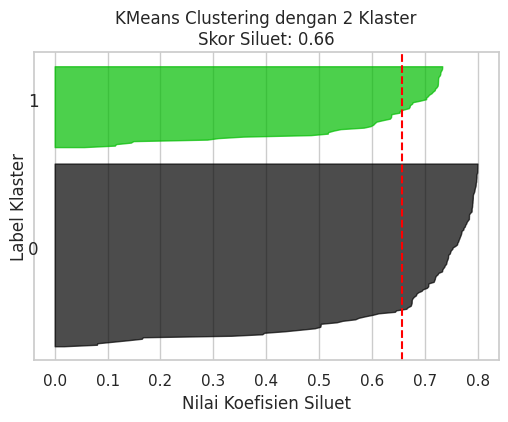

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


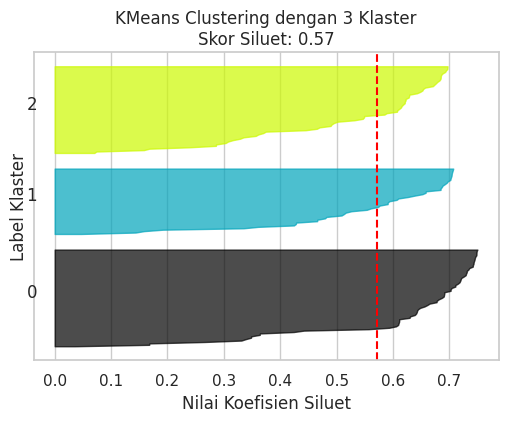

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


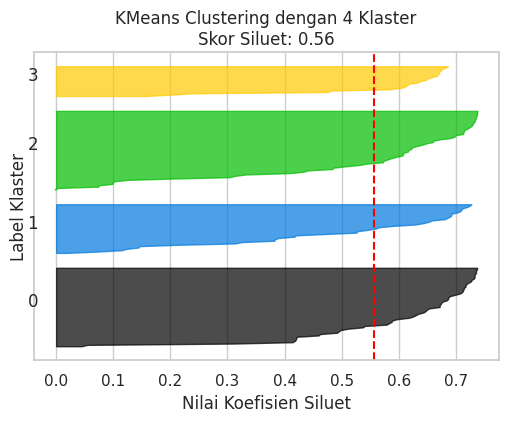

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


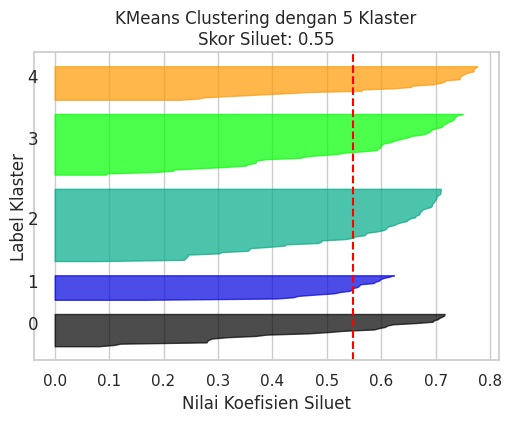

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


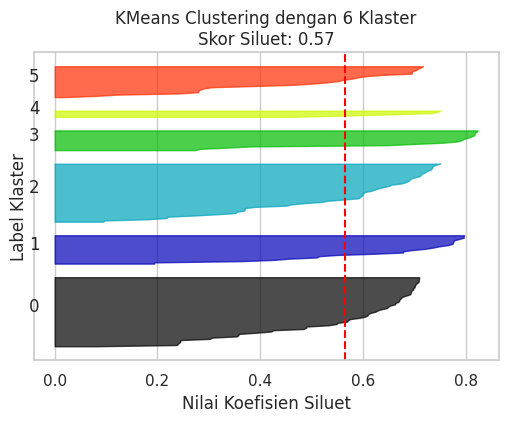

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


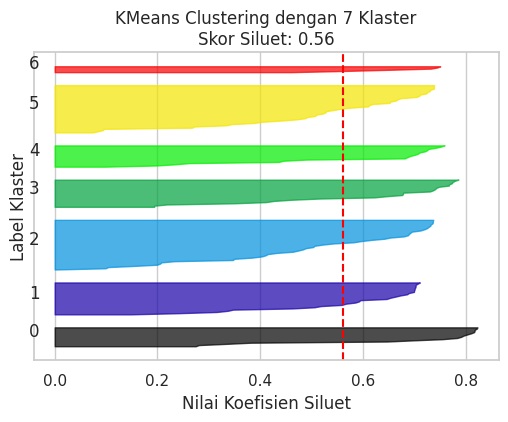

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


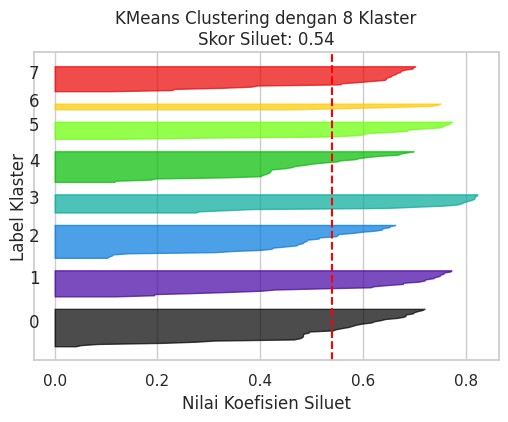

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


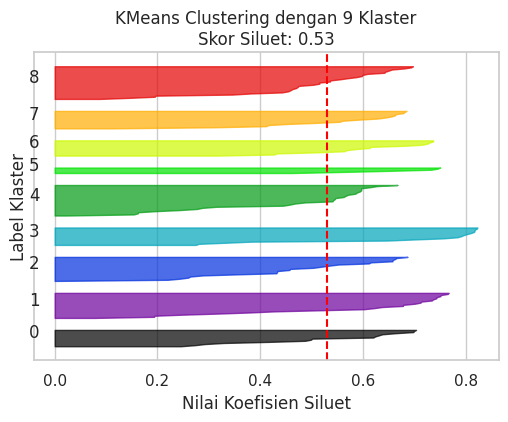

In [43]:
for k in range(2, min(10, len(X1) - 1)):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X1)
    silhouette_avg = silhouette_score(X1, labels)
    sample_silhouette_values = silhouette_samples(X1, labels)

    plt.figure(figsize=(6, 4))
    plt.title(f'KMeans Clustering dengan {k} Klaster\nSkor Siluet: {silhouette_avg:.2f}')

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.xlabel("Nilai Koefisien Siluet")
    plt.ylabel("Label Klaster")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([])
    plt.show()